In [32]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby

In [24]:
df = pd.read_csv('../data/blogtext_selection.csv')
print('Number of blogposts:',len(df))
print('Number of Authors:',len(set(df['id'].values)))
df.head()

Number of blogposts: 62697
Number of Authors: 304


,Unnamed: 0,id,gender,age,topic,sign,date,text
0,573,3176655,male,24,Engineering,Libra,"03,July,2004",If I had a band I'd call it '...
1,574,3176655,male,24,Engineering,Libra,"03,July,2004","Well... I hate to say it, bu..."
2,575,3176655,male,24,Engineering,Libra,"03,July,2004",How do we move on now? How d...
3,576,3176655,male,24,Engineering,Libra,"03,July,2004",Humor is my primary tool for ...
4,577,3176655,male,24,Engineering,Libra,"03,July,2004",Warning: If you know me and a...


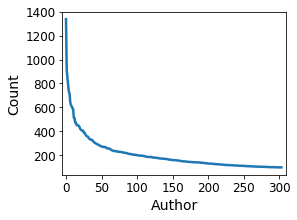

In [75]:
authors = df['id'].values
nr_authors = len(set(authors))
auth_freqs = sorted([(a, len(list(f))) for a,f in groupby(sorted(authors))],key=lambda tup:tup[1],reverse=True)
plt.figure(figsize=(4,3))
plt.plot(np.arange(len(auth_freqs)),[t[1] for t in auth_freqs], linewidth=2.5)
plt.xlabel('Author', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.ylim(0,1000)
plt.xlim(-5,309)
# plt.title('Blogpost counts of selected ' + str(nr_authors) + ' authors')
plt.savefig('count.eps', format='eps')
plt.show()

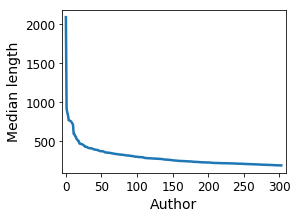

In [74]:
medians = []
for a in set(authors):
    a_df = df[df['id'] == a]
    medians.append(statistics.median([len(t) for t in a_df['text'].values])/5.5)
medians = sorted(medians, reverse=True)
plt.figure(figsize=(4,3))
plt.plot(np.arange(len(medians)),medians, linewidth=2.5)
plt.xlabel('Author', fontsize=14)
plt.ylabel('Median length', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.ylim(0,5000)
plt.xlim(-5, 309)
# plt.title('Median blogpost lengths of selected authors')
plt.savefig('length.eps', format='eps')
plt.show()

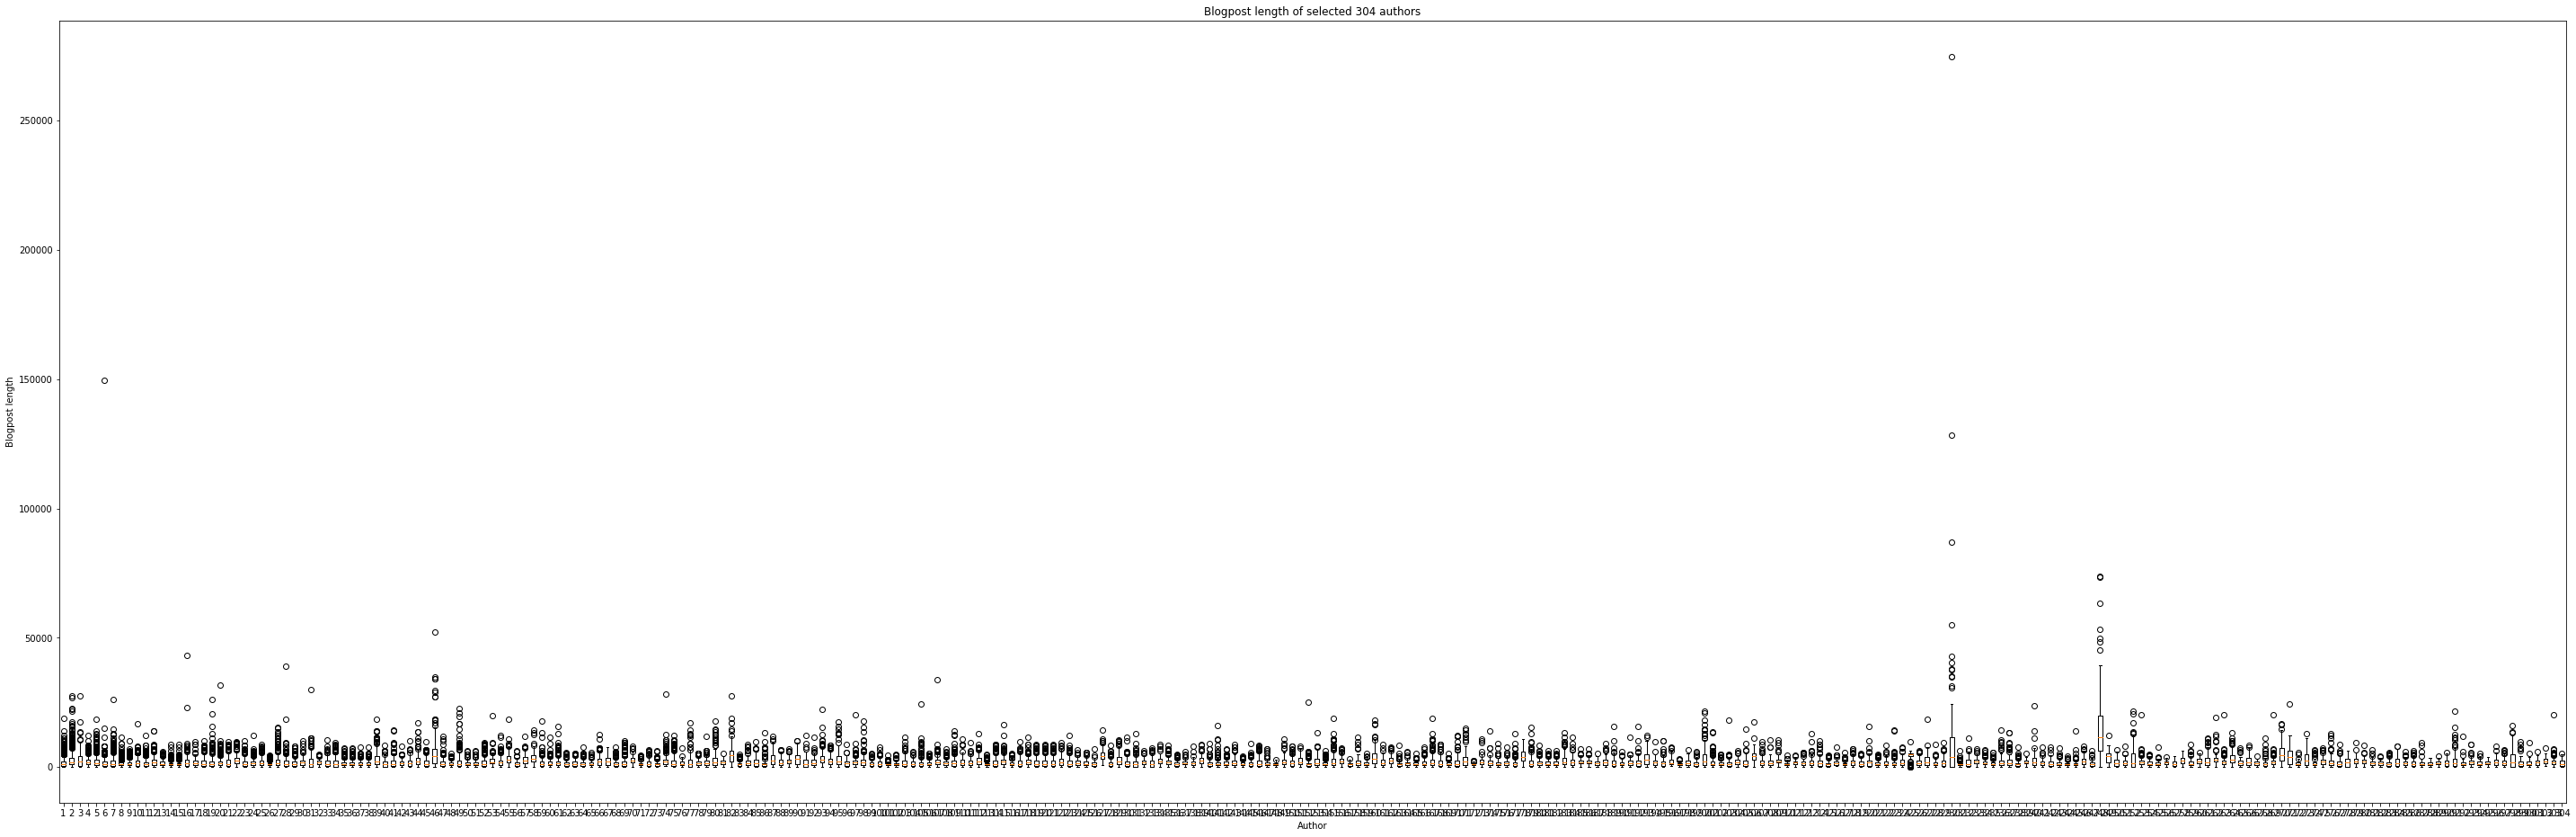

In [31]:
unique_auth = [t[0] for t in auth_freqs]
text_lengths = []
for i, a in enumerate(unique_auth):
    text_lengths.append([len(text) for text in df[df['id'] == a]['text'].values])
plt.figure(figsize=(50,16))
plt.xlabel('Author')
plt.ylabel('Blogpost length')
plt.title('Blogpost length of selected ' + str(nr_authors) + ' authors')
plt.boxplot(text_lengths)
plt.show()

In [18]:
means = sorted([sum(auth_texts)/len(auth_texts) for auth_texts in text_lengths])
print(means[:10])
print(means[-10:])

[43.57142857142857, 51.98701298701299, 53.84126984126984, 57.35294117647059, 62.83582089552239, 68.0, 71.26627218934911, 71.77374784110535, 72.89, 72.93548387096774]
[29772.666666666668, 32588.409090909092, 33361.46153846154, 35222.0, 36009.0, 37073.21428571428, 37234.166666666664, 50101.5, 92889.0, 127355.0]


In [5]:
# Manually dropping because of seemingly duplicate bloggers
fishy = np.array([3, 4, 6, 17, 18, 31, 34, 38, 43, 44, 45, 75, 84, 92, 94, 99])-1
filt_auth = [x for x in unique_auth]
for f in fishy:
    filt_auth[f] = -1
filt_auth = [x for x in filt_auth if x != -1]
df_filt = df[df['id'].map(lambda i: i in filt_auth)]

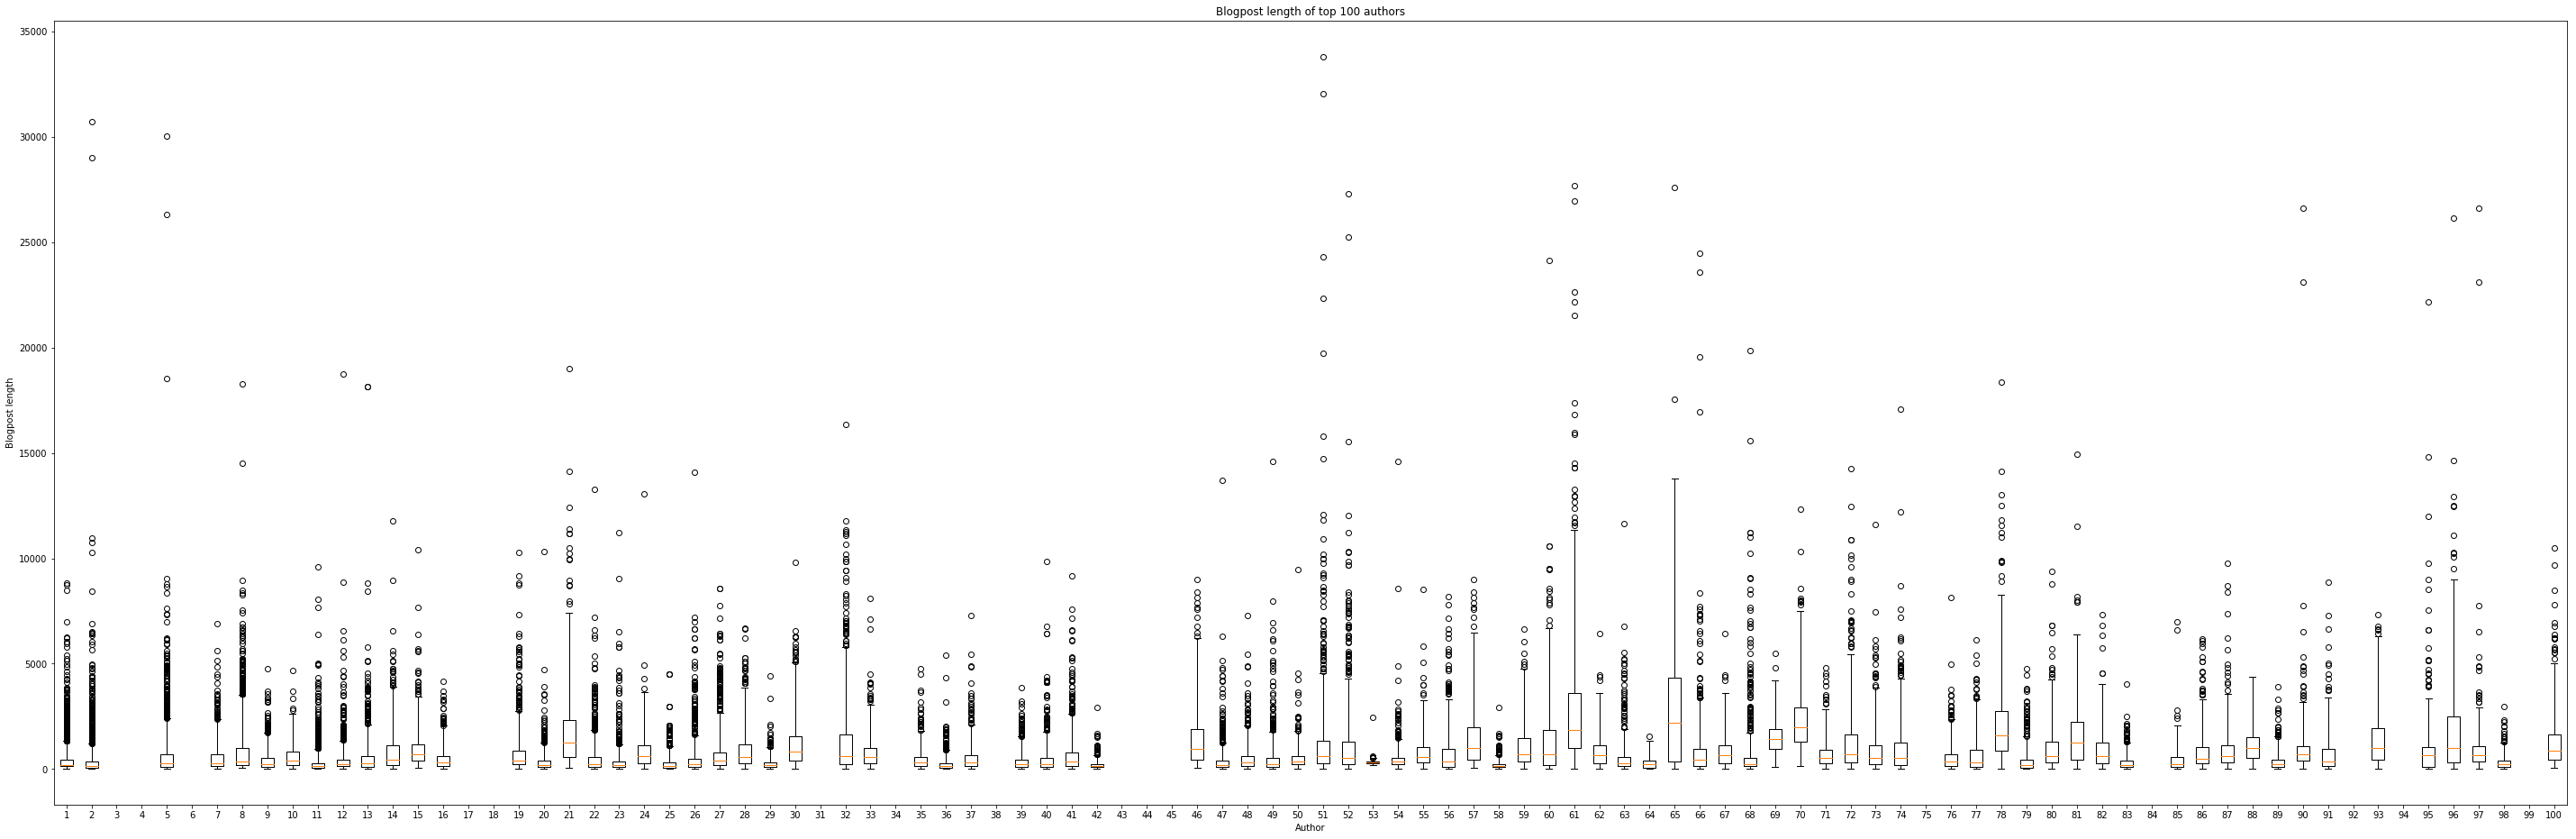

In [7]:
text_lengths = []
for a in unique_auth:
    text_lengths.append([len(text) for text in df_filt[df_filt['id'] == a]['text'].values])
plt.figure(figsize=(50,16))
plt.xlabel('Author')
plt.ylabel('Blogpost length')
plt.title('Blogpost length of selected authors')
plt.boxplot(text_lengths,whis=3)
plt.show()

In [9]:
df_filt.to_csv('../data/blogtext_selection_noduplicates.csv',index=False)